In [28]:
#Importing libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#To read data
data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [29]:
#to check the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [30]:
#check to find any null values
data.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

<AxesSubplot:>

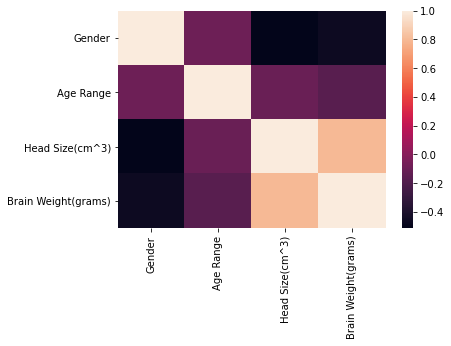

In [31]:
#data visualizing with correlation matrix
sns.heatmap(data.corr())

In [4]:
#Taking x & y variables
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [5]:
#to get shape of X
X.shape

(237,)

In [6]:
#to get shape of Y
Y.shape

(237,)

# #Manual coding & plotting

In [10]:
#we have Y = mX+b, where we need to find m and b

#to find mean of X & Y
mean_X = np.mean(X)
mean_Y = np.mean(Y)

# total no. of values
n = len(X)

#Using the formula Y = mX+c, we have to find values for m and c
numer = 0
denom = 0
for i in range(n):
    numer += ((X[i]-mean_X) * (Y[i]-mean_Y))
    denom += (X[i]-mean_X)**2
m = numer/denom
c = mean_Y - (m*mean_X)

print(m, ',', c)

0.26342933948939945 , 325.57342104944223


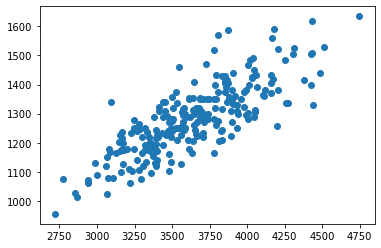

In [11]:
# ploting
plt.scatter(X, Y)

Text(0, 0.5, 'Brain weight in grams')

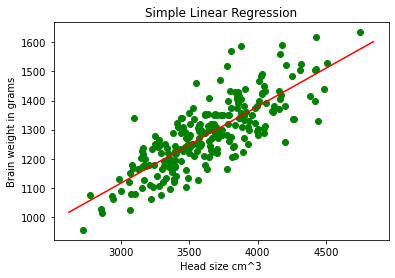

In [12]:
# To create dummy test case
min_x = np.min(X)-100
max_x = np.max(X)+100

x = np.linspace(min_x,max_x,1000)

y = m*x+c

plt.scatter(X,Y,color='g')
plt.plot(x,y,color='r')
plt.title('Simple Linear Regression')
plt.xlabel('Head size cm^3')
plt.ylabel('Brain weight in grams')

In [14]:
# to calculate the error
sum_pred = 0
sum_act = 0

for i in range(n):
    y_pred = (m*X[i]+c)
    sum_pred += (Y[i]-y_pred)**2
    sum_act +=(Y[i]-mean_Y)**2

r2 = 1-(sum_pred/sum_act)
print(r2)

#Here we can observe that we got R**2> 0.5 (0.6393117199570003) . so we have good model

0.6393117199570003


In [15]:
def predict(x):
    y = m*x + c
    print(y)

In [17]:
#here we predict the brain wieght for given head size(cm^3)
predict(4177)

1425.9177720966638


# Using Scikit learn

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [20]:
# we can't use rank 1 matrix with scikit learn, so we need to change the shape
X = X.reshape((n,1))

In [22]:
print(X.shape)
print(y.shape)

(237, 1)
(1000,)


In [24]:
# to create model
lr = LinearRegression()

# fitting traning data
lr = lr.fit(X, Y)

#Y prediction
y_pred = lr.predict(X)

#calculating root mean square error
mse = mean_squared_error(Y, y_pred)
rmse = np.sqrt(mse)
r2_score = lr.score(X, Y)

print(rmse)
print(r2_score)

#we got the same r2 score as manual method. ie, 0.639311719957

72.1206213783709
0.639311719957


In [26]:
lr.predict([[4177]])

array([1425.9177721])

In [27]:
lr.intercept_

325.5734210494428